## Iskanje strukture v podatkih

Podatkovno rudarjenje, naloga, `<3.4.2022>`  
**`<Jorg Cimperman>`**

Z modeliranjem skušamo poiskati strukturo v podatkih. Z metodami nenadzorovanga modeliranja skušamo poiskati skupine podobnih podatkov oz. skupine primerov.

V nalogi boste uporabili modeliranje verjetnostnih porazdelitev za iskanje osamelcev ter metode za iskanje skupin podobnih primerov (gručenje).

### Podatki

Opis podatkovne zbirke MovieLens ostaja enak prvi nalogi.

### Vprašanja

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne toliko implementacija vaše rešitve.

#### 1. Iskanje osamelcev (50%) 
O ocenah katerih filmov so si uporabniki najmanj enotni? Povedano drugače, za katere filme so pripadajoče ocene najbolj razpršene?

Formuliraj problem kot modeliranje verjetnostne porazdelitve. Premisli o naslednjih vprašanjih, naredi ustrezne poizkuse in odgovori.

In [2]:
from csv import DictReader
import array as arr
import matplotlib.pyplot as plt
from csv import DictReader
import array as arr

rRatings = []
rCast = []
rLinks = []
rMovies = []
rTags = []

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]
    rRatings.append([user, movie, rating, timestamp])
print(rRatings[0])

reader = DictReader(open('podatki/ml-latest-small/cast.csv', 'rt', encoding='utf-8'))
for row in reader:
    movie = row["movieId"]
    cast = row["cast"]
    rCast.append([movie, cast])
print(rCast[0])

reader = DictReader(open('podatki/ml-latest-small/links.csv', 'rt', encoding='utf-8'))
for row in reader:
    movie = row["movieId"]
    imdb = row["imdbId"]
    tmdb = row["tmdbId"]
    rLinks.append([movie, imdb, tmdb])
print(rLinks[0])

DictMovies =  {}
reader = DictReader(open('podatki/ml-latest-small/movies.csv', 'rt', encoding='utf-8'))
for row in reader:
    movie = row["movieId"]
    title = row["title"]
    genres = row["genres"]
    rMovies.append([movie, title, genres])
    DictMovies[movie] = title
print(rMovies[0])

reader = DictReader(open('podatki/ml-latest-small/tags.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    tag = row["tag"]
    timestamp = row["timestamp"]
    rTags.append([user, movie, tag, timestamp])
print(rTags[0])

import pandas as panda
pratings = panda.read_csv('podatki/ml-latest-small/ratings.csv')
pmovies = panda.read_csv('podatki/ml-latest-small/movies.csv')
pcast = panda.read_csv('podatki/ml-latest-small/cast.csv')
plinks = panda.read_csv('podatki/ml-latest-small/movies.csv')
ptags = panda.read_csv('podatki/ml-latest-small/tags.csv')

['1', '31', '2.5', '1260759144']
['1', 'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste|']
['1', '114709', '862']
['1', 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy']
['15', '339', "sandra 'boring' bullock", '1138537770']


In [4]:
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from scipy.stats import t as student
from scipy.stats import beta
import numpy as np

Dict = {}

for x in rRatings:
    if x[1] not in Dict:
        Dict[x[1]] = {"ocena":[float(x[2])]}
    else:
        Dict[x[1]]["ocena"].append(float(x[2]))

arratings = []
var = []
for z in Dict:
    if len(Dict[z]["ocena"]) > 10:
        arratings.append([z, np.var(Dict[z]["ocena"])])
        var.append(np.var(Dict[z]["ocena"]))

arratings.sort(key = lambda x: x[1], reverse=True)

for i in range(10):
    print(DictMovies[arratings[i][0]], "varianca:", round(arratings[i][1],2))

Cook the Thief His Wife & Her Lover, The (1989) varianca: 2.48
Deadpool (2016) varianca: 2.29
Event Horizon (1997) varianca: 2.22
Great Expectations (1998) varianca: 2.16
Dead Man (1995) varianca: 2.16
Christmas Carol, A (1938) varianca: 2.07
Aeon Flux (2005) varianca: 2.06
Grudge, The (2004) varianca: 2.02
Eraserhead (1977) varianca: 1.95
Celebration, The (Festen) (1998) varianca: 1.91


Odgovor: **odgovor lahko zapišete v več celic**

#### 1.1. vprašanje:

Katera je ustrezna naključna spremenljivka (količina) v podatkih, ki odgovarja na vprašanje?

Odgovor: **Ustrezna naključna spremenčjivka je varianca ocen posameznega filma.**

#### 1.2. vprašanje:
Nariši njeno porazdelitev, npr., s pomočjo histograma.

<AxesSubplot:ylabel='Frequency'>

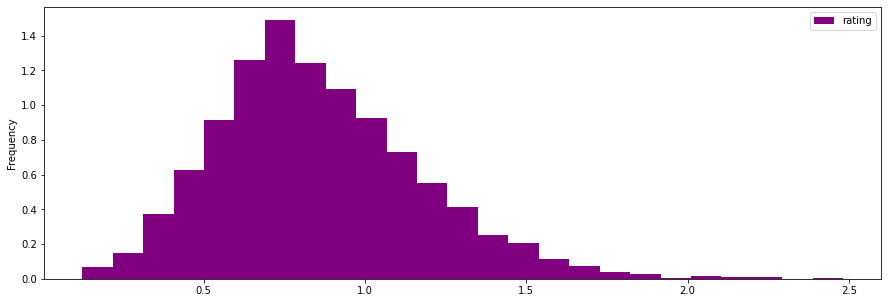

In [5]:
variable = pratings.groupby("movieId").filter(lambda x : x['rating'].count() > 10)
variable.groupby(by="movieId").var(ddof=0)[['rating']].plot.hist(bins=25, figsize=(15,5),density=True, color="purple")

#### 1.3. vprašanje:

Ali porazdelitev spominja na kakšno znano porazdelitev? Ali je porazdelitev morda normalna ali katera druga? 

Odgovor: **Spominja na normalno, a po natančnejšem pregledu izgleda da je bolj beta porazdelitev.**

#### 1.4. vprašanje:

Oceni parametre te porazdelitve s pomočjo postopkov, ki smo jih spoznali na vajah.  Izmed porazdelitev, ki smo jih spoznali na vajah, izberi tisto, ki se podatkom najbolj prilega.        

C:\Users\Swagter\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


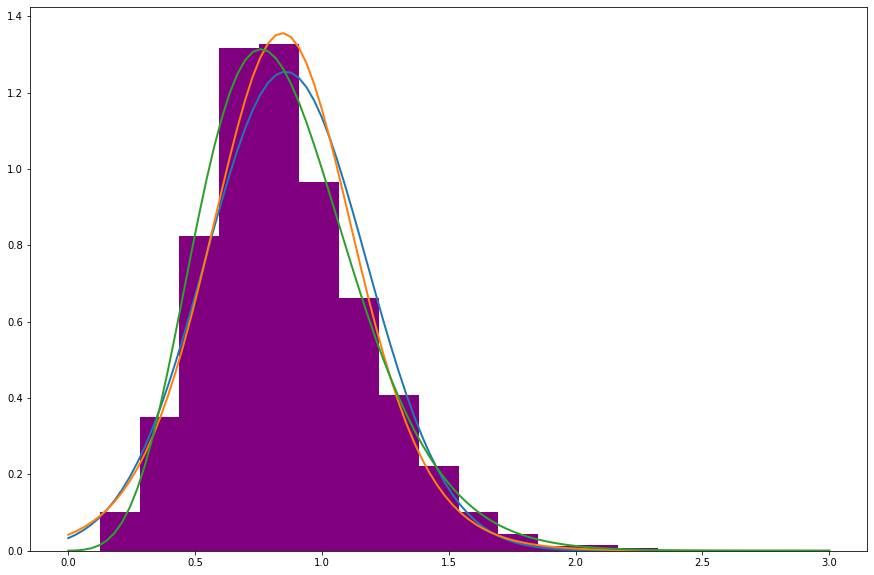

In [6]:
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from scipy.stats import t as student
from scipy.stats import beta
import numpy as np

variable = variable.groupby("movieId").var(ddof=0)[["rating"]]
nmbr = variable.count().values[0]

mu_fit = variable.mean()
sigma2_fit = variable.var().values[0] * (nmbr-1)/nmbr
xr = np.linspace(0,3,100)
N_fit = [mvn.pdf(x, mu_fit, sigma2_fit) for x in xr]
pars = student.fit(variable)

S_fit = [student.pdf(x, *pars) for x in xr]
pars = beta.fit(variable)
B_fit = [beta.pdf(x, *pars) for x in xr]

plt.figure(figsize=(15,10))
plt.hist(variable, density=True, bins=15, color="purple")
plt.plot(xr, N_fit, label="Normalna porazdelitev", linewidth=2.0)
plt.plot(xr, S_fit, label="Študentova porazdelitev", linewidth=2.0)
plt.plot(xr, B_fit, label="Beta porazdelitev", linewidth=2.0)



Odgovor: **Zgleda, da je porazdelitev beta.**

#### 1.5. vprašanje:

Izpiši filme z vrednostjo naključne spremenljivke, ki spada v zgornjih 5% statistično značilnih primerov. 

In [7]:
xr = np.linspace(0,3,10)
width = xr[1] - xr[0]
pars = beta.fit(var)
alpha = 0.05
tmp = []
for arr in arratings:
    ltx = xr[xr >= arr[1]]
    Pltx = [beta.pdf(x, *pars) * width for x in ltx]
    res = np.sum(Pltx)
    if res < alpha:
        tmp.append(arr[0])
for x in rMovies:
    for y in tmp:
        if y == x[0]:
            print(x[1],", ", end=" ", sep="")


C:\Users\Swagter\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Four Rooms (1995),  Money Train (1995),  Bio-Dome (1996),  Lord of Illusions (1995),  Prophecy, The (1995),  Showgirls (1995),  Billy Madison (1995),  Goofy Movie, A (1995),  Secret of Roan Inish, The (1994),  Vanya on 42nd Street (1994),  Virtuosity (1995),  Sliver (1993),  Kids in the Hall: Brain Candy (1996),  Space Jam (1996),  Dead Man (1995),  Striptease (1996),  Escape from L.A. (1996),  Adventures of Robin Hood, The (1938),  Angels in the Outfield (1994),  Pete's Dragon (1977),  Christmas Carol, A (1938),  Return of the Pink Panther, The (1975),  Cook the Thief His Wife & Her Lover, The (1989),  English Patient, The (1996),  Sex, Lies, and Videotape (1989),  Harold and Maude (1971),  Dead Alive (Braindead) (1992),  Rosencrantz and Guildenstern Are Dead (1990),  8 1/2 (8½) (1963),  Bad Taste (1987),  Unbearable Lightness of Being, The (1988),  Pink Floyd: The Wall (1982),  Mirror Has Two Faces, The (1996),  Breaking the Waves (1996),  Sling Blade (1996),  Absolute Power (1997), 

Odgovor: **odgovor lahko zapišete v več celic**

#### 2. Gručenje filmov (50%)

Priporočilni sistemi pogosto odkrivajo skupine predmetov (v našem primeru filme), za katere velja visoka medsebojna podobnost.

Poiščite 100 najbolj gledanih filmov. Ali med njimi obstajajo skupine?
Uporabite ustrezen algoritem za gručenje. Na film lahko gledamo kot vektor, kjer je  
število komponent enako številu uporabnikov. 

Vektorji vsebujejo tudi *neznane vrednosti*.
Primer vektorjev za deset filmov prikazuje spodnja tabela.

Algoritme gručenja lahko izvajamo v izvornem prostoru (koordinatni sistem filmi-uporabniki) ali pa filme primerjamo z merami podobnosti, ki smo jih spoznali na vajah. 
Premisli, kateri način je primernejši glede na obliko podatkov.

| x          |Movie                                      | $u_0$ |$u_1$ | $u_2$ | $\cdots$ |
|------------|-------------------------------------------|:-----:|:----:|:------|:--------:|
|$\vec{x_0}$ | Fight Club (1999)                         | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_1}$ | Twelve Monkeys (a.k.a. 12 Monkeys) (1995) | ?     | ?    | 2.5   | $\cdots$ |
|$\vec{x_2}$ | Independence Day (a.k.a. ID4) (1996)      | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_3}$ | Dances with  Wolves (1990)                | 4.0   | ?    | ?     | $\cdots$ |
|$\vec{x_4}$ | Fargo (1996)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_5}$ | Speed (1994)                              | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_6}$ | Apollo 13 (1995)                          | ?     | 2.0  | ?     | $\cdots$ |
|$\vec{x_7}$ | Seven (a.k.a. Se7en) (1995)               | ?     | ?    | ?     | $\cdots$ |
|$\vec{x_8}$ | Sixth Sense, The (1999)                   | 3.0   | ?    | 4.0   | $\cdots$ |
|$\vec{x_9}$ | Aladdin (1992)                            | ?     | ?    | ?     | $\cdots$ |
|$\cdots$    | $\cdots$                                  | $\cdots$ | $\cdots$  | $\cdots$ | $\cdots$ |

Pri tem odgovori na naslednja vprašanja.

In [8]:
from collections import defaultdict

rmovies2 = DictReader(open("podatki/ml-latest-small/movies.csv", "rt", encoding="utf-8"))
mov = np.array([(row['movieId'], row["title"], row["genres"]) for row in rmovies2])
movd = panda.DataFrame(mov, columns = ['movieId', 'title', 'genres'])

rratings2 = DictReader(open("podatki/ml-latest-small/ratings.csv", "rt", encoding="utf-8"))
rate = np.array([(row['userId'], row['movieId'], row["rating"], row["timestamp"]) for row in rratings2])
rated = panda.DataFrame(rate, columns = ['userId', 'movieId', 'rating', 'timestamp'])

films = defaultdict(int)
for rating in rate:
    films[rating[1]] +=1

best = sorted(list(films.items()), key=lambda x:x[1], reverse=True)
best = np.array(best)[:,0][:100]

data = rated[rated.apply(lambda x:x['movieId'] in best, axis=1)]
datax = data.pivot(index="movieId", columns="userId", values="rating")
datax = datax.fillna(0)

labels = []
for x in rMovies:
    for y in datax.index:
        if y == x[0]:
            labels.append(x[1])

labels



['Toy Story (1995)',
 'GoldenEye (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Babe (1995)',
 'Clueless (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'Braveheart (1995)',
 'Apollo 13 (1995)',
 'Batman Forever (1995)',
 'Die Hard: With a Vengeance (1995)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Interview with the Vampire: The Vampire Chronicles (1994)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)',
 'Pulp Fiction (1994)',
 'Stargate (1994)',
 'Shawshank Redemption, The (1994)',
 'Ace Ventura: Pet Detective (1994)',
 'Forrest Gump (1994)',
 'Four Weddings and a Funeral (1994)',
 'Lion King, The (1994)',
 'Mask, The (1994)',
 'Speed (1994)',
 'True Lies (1994)',
 'Fugitive, The (1993)',
 'Jurassic Park (1993)',
 'Mrs. Doubtfire (1993)',
 "Schindler's List (1993)",
 'Sleepless in Seattle (1993)',
 'Blade Runner (1982)',
 'Home Alone (1990)',
 'Ghost (1990)',
 'Aladdin (1992)',
 'T

#### 2.1. vprašanje:

Utemelji izbiro algoritma in mere podobnosti.

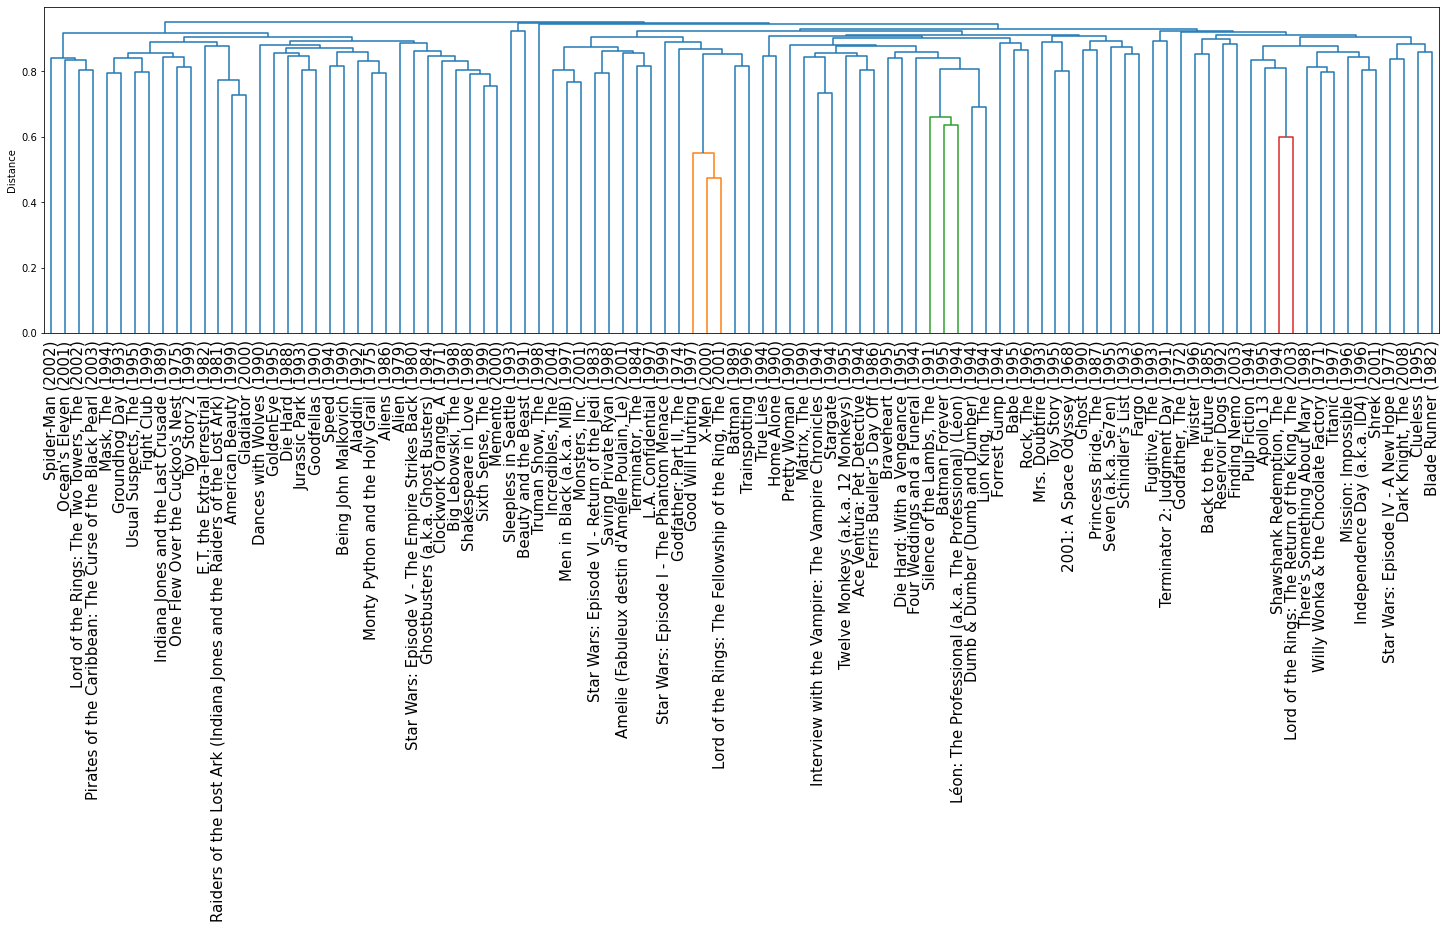

In [9]:
import scipy.cluster.hierarchy as archy
from sklearn.metrics import silhouette_score

link = archy.linkage(datax, method='average', metric='jaccard')
plt.figure(figsize=(25,6))

dendo = archy.dendrogram(link, labels=labels, leaf_font_size=15)
plt.ylabel("Distance")
plt.show()

Odgovor: **Uporabil bi algoritem za hierarhično gručenje. Ta algoritem bi izbral, ker omogoča primerjavo na podlagi razdalje med objekti**

#### 2.2. vprašanje:

Koliko skupin filmov je med izbranimi? Ali poznamo kvantitativne ocene za različne možnosti razvrščanja v skupine?

In [10]:
t=0.77
clusters = archy.fcluster(link, t=t, criterion="distance").ravel()
groupname, counter = np.unique(clusters, return_counts=True)

saver = [id for id,idc in zip(groupname, counter) if idc>1]
print(len(saver), "skupin.")

score = silhouette_score(datax, clusters, metric="jaccard")
print("Ocena:", round(score,4))
print("Kvantitativnih ocen v tem primeru ne poznamo, saj nimamo resničnih, pravilnih skupin.")

8 skupin.
Ocena: 0.0329
Kvantitativnih ocen v tem primeru ne poznamo, saj nimamo resničnih, pravilnih skupin.


C:\Users\Swagter\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


#### 2.3. vprašanje:

Prikaži rezultate z uporabo ustrezne vizualizacije.

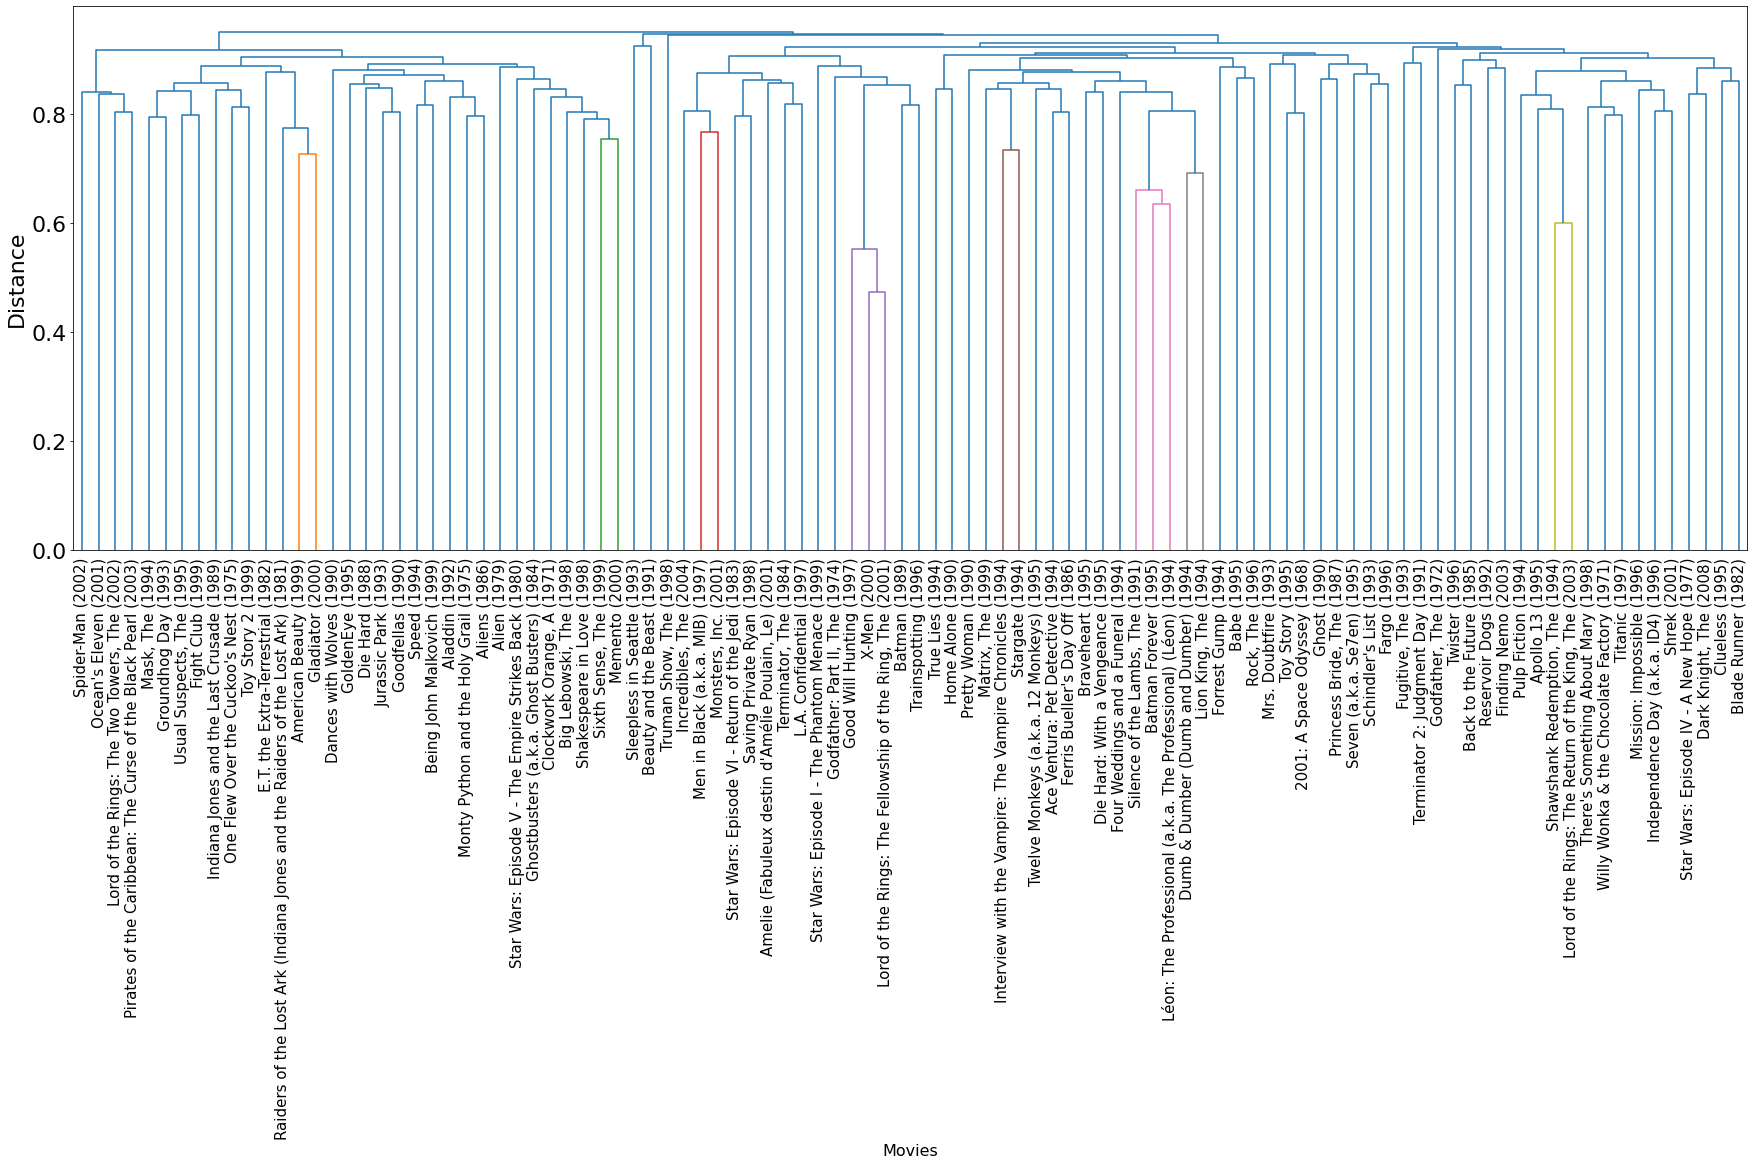

In [11]:
plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 22})
dendo = archy.dendrogram(link, labels=labels, color_threshold=t, leaf_font_size=15)
plt.ylabel("Distance")
plt.xlabel("Movies", fontsize=16)
plt.show()

#### 2.4. vprašanje:

Komentiraj smiselnost dobljenih rezultatov.

(Občasno smiselno). Kot npr kombinacija Sixth sense + Memento je smiselno, ker je oboje triler. Filma sta bila izdana z zamakom enega leta. Dober primer je tudi MiB in Monsters inc., saj so tematika pri obeh neke vrste agenti.